<a href="https://colab.research.google.com/github/Jeetendra-Shakya/Transfer-Learning-DenseNet201/blob/main/Transfer_Learning_DenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning DenseNet201 using Keras

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Apr 20 06:06:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Please download the dataset from the below url

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/Datasets.zip

unzip:  cannot find or open /content/drive/MyDrive/Datasets.zip, /content/drive/MyDrive/Datasets.zip.zip or /content/drive/MyDrive/Datasets.zip.ZIP.


In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [12]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/test'


In [13]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

DenseNet201 = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




74842112/74836368 [==============================] - 1s 0us/step


In [14]:
# don't train existing weights
for layer in DenseNet201.layers:
    layer.trainable = False

In [15]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/train/*')

In [16]:
# our layers - you can add more if you want
x = Flatten()(DenseNet201.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=DenseNet201.input, outputs=prediction)

In [18]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5000 images belonging to 2 classes.


In [23]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
625/625 [==============================] - 14884s 24s/step - loss: 0.5165 - accuracy: 0.9580 - val_loss: 0.3796 - val_accuracy: 0.9830
Epoch 2/50
625/625 [==============================] - 310s 496ms/step - loss: 0.3463 - accuracy: 0.9850 - val_loss: 0.4602 - val_accuracy: 0.9856
Epoch 3/50
625/625 [==============================] - 304s 486ms/step - loss: 0.3065 - accuracy: 0.9877 - val_loss: 0.8102 - val_accuracy: 0.9810
Epoch 4/50
625/625 [==============================] - 296s 473ms/step - loss: 0.2834 - accuracy: 0.9891 - val_loss: 0.7038 - val_accuracy: 0.9830
Epoch 5/50
625/625 [==============================] - 293s 469ms/step - loss: 0.2590 - accuracy: 0.9901 - val_loss: 0.8591 - val_accuracy: 0.9838
Epoch 6/50
625/625 [==============================] - 293s 469ms/step - loss: 0.2869 - accuracy: 0.9921 - val_loss: 0.8710 - val_accuracy: 0.9846
Epoch 7/50
625/625 [==============================] - 292s 467ms/step - loss: 0.2298 - accuracy: 0.9933 - val_loss: 0.9111 -

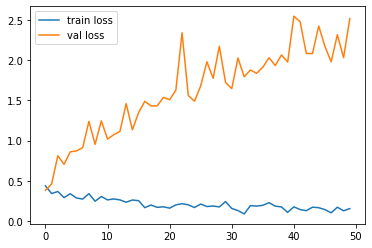

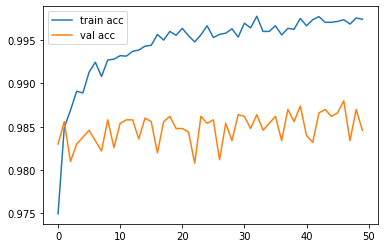

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_DenseNet201')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_DenseNet201')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_DenseNet201.h5')

In [27]:

y_pred = model.predict(test_set)


In [28]:
y_pred

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('model_DenseNet201.h5')

In [33]:
img=image.load_img('/content/drive/MyDrive/Datasets/test/cat/cat.10019.jpg',target_size=(224,224))

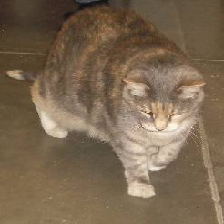

In [34]:
img

In [35]:
x=image.img_to_array(img)
x

array([[[ 61.,  44.,  36.],
        [ 61.,  44.,  36.],
        [ 62.,  45.,  37.],
        ...,
        [ 83.,  67.,  44.],
        [ 82.,  66.,  43.],
        [ 81.,  65.,  42.]],

       [[ 63.,  46.,  38.],
        [ 64.,  47.,  39.],
        [ 64.,  47.,  39.],
        ...,
        [ 86.,  70.,  47.],
        [ 84.,  68.,  45.],
        [ 83.,  67.,  44.]],

       [[ 63.,  46.,  38.],
        [ 63.,  46.,  38.],
        [ 64.,  47.,  39.],
        ...,
        [ 86.,  70.,  47.],
        [ 83.,  67.,  44.],
        [ 82.,  66.,  43.]],

       ...,

       [[135., 115.,  82.],
        [135., 115.,  82.],
        [136., 116.,  83.],
        ...,
        [169., 148., 121.],
        [200., 178., 154.],
        [171., 149., 125.]],

       [[135., 115.,  82.],
        [136., 116.,  83.],
        [136., 116.,  83.],
        ...,
        [166., 145., 118.],
        [196., 174., 150.],
        [176., 154., 130.]],

       [[136., 116.,  83.],
        [137., 117.,  84.],
        [137., 1

In [36]:
x.shape

(224, 224, 3)

In [37]:
test_image = image.img_to_array(x)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [38]:
result

array([[1., 0.]], dtype=float32)

In [39]:
model.predict(test_image)

array([[1., 0.]], dtype=float32)

In [40]:
a=np.argmax(model.predict(test_image), axis=1)

In [41]:
a

array([0])

In [42]:
if a == 0:
  print("The image classified is cat")
else:
  print("The image classified is dog")

The image classified is cat
